<a href="https://colab.research.google.com/github/Aswin-Cheerngodan/AI-ML-books/blob/main/stock_price_model_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model development

Try different models like LSTM, GRU, Transformers

Importing dependencies

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input, GRU, BatchNormalization, Bidirectional
from sklearn.preprocessing import StandardScaler

In [85]:
stock = "microsoft"

In [86]:
df = pd.read_csv("/content/microsoft.csv")
scaler = StandardScaler()

data = df[[ 'Open', 'Close', 'High', 'Low', 'Volume','normalized']].values

split = int(0.95*len(data))
train_data = data[:split]
test_data = data[split:]

train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

train_data.shape,test_data.shape

((1471, 6), (78, 6))

In [87]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data)-window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, 0])

    return np.array(X), np.array(y)

window_size = 10
X_train, y_train = create_sequences(train_data, window_size)
X_test, y_test = create_sequences(test_data, window_size)

X_train.shape, y_train.shape

((1461, 10, 6), (1461,))

In [88]:
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=1024, return_sequences=True),
    Dropout(0.1),
    Bidirectional(LSTM(units=512, return_sequences=True)),
    Dropout(0.1),
    LSTM(units=256, return_sequences=True),
    Dropout(0.1),
    Bidirectional(LSTM(units=128, return_sequences=False)),
    Dense(units=256, activation='relu'),
    Dense(units=128, activation='tanh'),
    Dense(units=64, activation='relu'),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [89]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                       │ (None, 10, 1024)            │       4,222,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 10, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_10 (Bidirectional)     │ (None, 10, 1024)            │       6,295,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 10, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 10, 256)             │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 10, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_11 (Bidirectional)     │ (None, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,331,521 (47.04 MB)

 Trainable params: 12,331,521 (47.04 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=16,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.1937 - val_loss: 0.0212
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0194 - val_loss: 0.0186
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0128 - val_loss: 0.0175
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0080 - val_loss: 0.0445
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0105 - val_loss: 0.0341
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0084 - val_loss: 0.0137
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0050 - val_loss: 0.0075
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0065 - val_loss: 0.0107
Epoch 9/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0080 - val_loss: 0.0087
Epoch 10/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0080 - val_loss: 0.0156
Epoch 11/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0047 - val_loss: 0.0056
Epoch 12/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0

In [91]:
predicted_prices = model.predict(X_train)

def inverse_transform(scaled_data, scaler):
    dummy = np.zeros((len(scaled_data), 6))
    dummy[:, 0] = scaled_data.flatten()
    return scaler.inverse_transform(dummy)[:, 0]

46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step


In [92]:
actual_prices = inverse_transform(y_train, scaler)
predicted_prices = inverse_transform(predicted_prices, scaler)

actual_prices.shape, predicted_prices.shape

((1461,), (1461,))

In [93]:
test_data.shape

(78, 6)

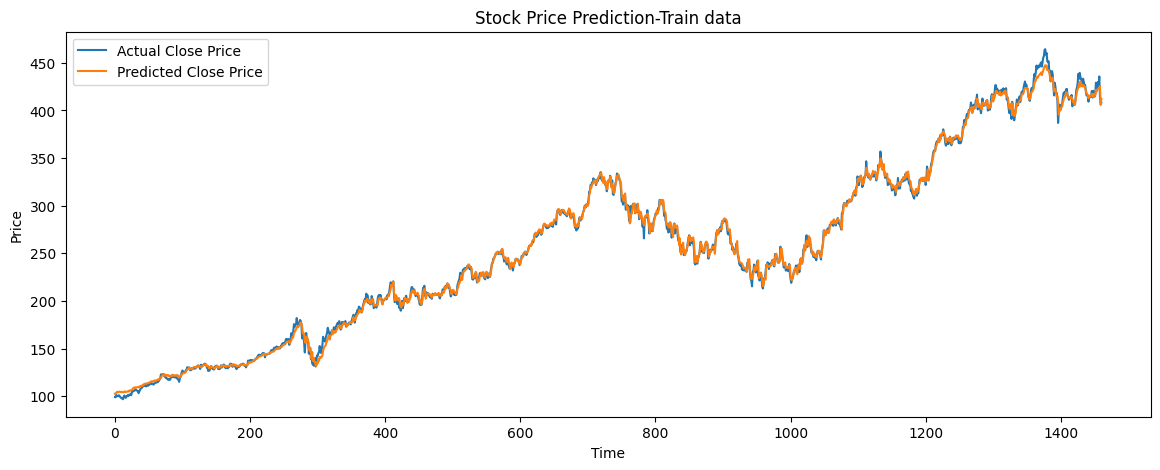

In [94]:
plt.figure(figsize=(14,5))
plt.plot(actual_prices, label='Actual Close Price')
plt.plot(predicted_prices, label='Predicted Close Price')
plt.title('Stock Price Prediction-Train data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


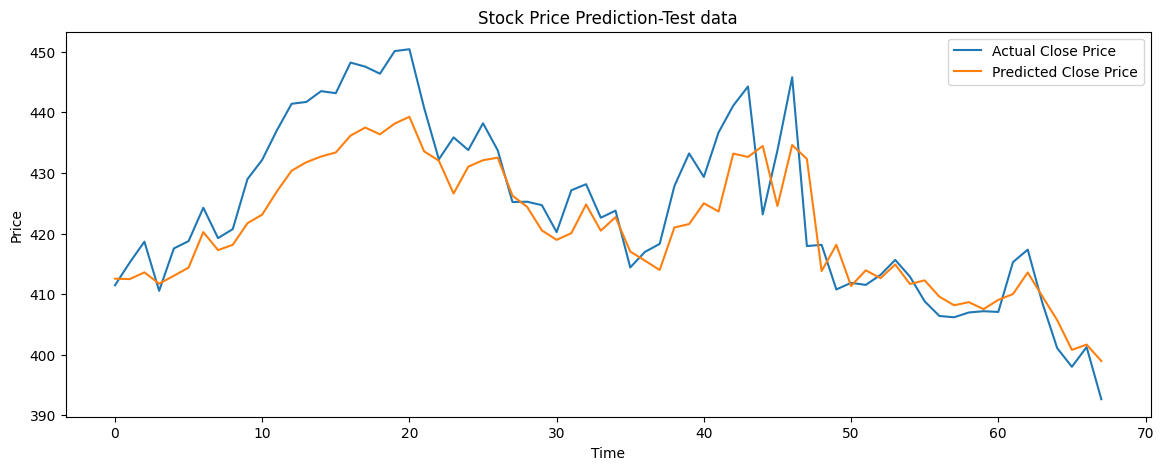

In [95]:
predicted_prices = model.predict(X_test)

actual_prices = inverse_transform(y_test, scaler)
predicted_prices = inverse_transform(predicted_prices, scaler)

plt.figure(figsize=(14,5))
plt.plot(actual_prices, label='Actual Close Price')
plt.plot(predicted_prices, label='Predicted Close Price')
plt.title('Stock Price Prediction-Test data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [96]:
from sklearn.metrics import mean_absolute_percentage_error

mse = mean_absolute_percentage_error(actual_prices, predicted_prices)
print(mse)

0.012369184401577188


In [97]:
import joblib

joblib.dump(scaler, f"{stock}_scaler.pkl")

['microsoft_scaler.pkl']

### Insights

There are noticeable differences in the validation prediction pattern with 'normalized sentiment' feature and without the feature. it shows the significance of that feature identifying the patterns in the data.    